In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Read the data
df = pd.read_csv('Pokemon.csv')

In [3]:
# Print the first 5 rows of the data
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Get the shape of the data
df.shape

(800, 13)

In [5]:
# Check the data types of the variables
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [6]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
# Check missing values
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
# Drop the Type2 column
df.drop(['#', 'Name', 'Type 1','Type 2','Total','Generation','Legendary'], axis=1, inplace=True)

In [9]:
# Rename column
# df.rename(columns={'Attack': 'attack', 'Defense': 'defense'}, inplace=True)
df.columns= df.columns.str.lower()

In [10]:
df

,hp,attack,defense,sp. atk,sp. def,speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
795,50,100,150,100,150,50
796,50,160,110,160,110,110
797,80,110,60,150,130,70
798,80,160,60,170,130,80


In [11]:
from sklearn.preprocessing import StandardScaler
#Normalisasi Data
X = df.iloc[:,0:6]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.95062622, -0.92490618, -0.79715364, -0.2391303 , -0.24818854,
        -0.80150318],
       [-0.3628221 , -0.5241302 , -0.34791742,  0.21955954,  0.29115635,
        -0.28501525],
       [ 0.42091674,  0.09244823,  0.29384863,  0.83114599,  1.01028289,
         0.40363531],
       ...,
       [ 0.42091674,  0.95565803, -0.44418232,  2.36011211,  2.08897269,
         0.05931003],
       [ 0.42091674,  2.49710411, -0.44418232,  2.97169856,  2.08897269,
         0.40363531],
       [ 0.42091674,  0.95565803,  1.4811158 ,  1.74852566,  0.65071962,
         0.05931003]])

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
x_reduced = pca.fit_transform(X)

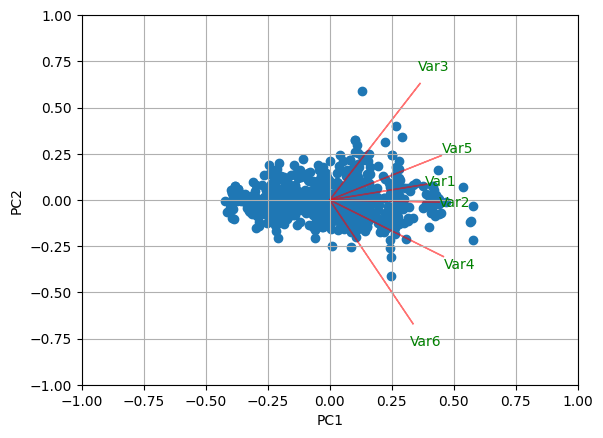

In [26]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max()-xs.min())
    scaley = 1.0/(ys.max()-ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)        
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_reduced[:,0:6],np.transpose(pca.components_[0:2, :]))
plt.show()

Berdasarkan hasil plottingan diatas, kepentingna untuk setiap fitur dicerminkan oleh besarnya nilai yang berkorespondensi pada eigenvector (higher magnitude - higher importance) 

In [27]:
pca.explained_variance_ratio_

array([0.45190665, 0.18225358, 0.12979086, 0.12011089, 0.07142337,
       0.04451466])

PC1 berisi 45% dan PC2 18%. Bersama-sama komponen PC1 dan PC2 saja, maka terdapat total 63% informasi.

In [28]:
print(abs(pca.components_))
print((abs(pca.components_).shape))

[[0.38988584 0.43925373 0.36374733 0.45716229 0.4485704  0.33544048]
 [0.08483455 0.01182493 0.62878867 0.30541446 0.2390967  0.66846305]
 [0.47192614 0.59415339 0.06933913 0.30561186 0.56559403 0.07851327]
 [0.71769131 0.4058359  0.41923734 0.14751659 0.18544475 0.29716251]
 [0.21999056 0.19025457 0.05903197 0.73534497 0.3001997  0.53016082]
 [0.23366897 0.50298956 0.53689856 0.20453036 0.54517075 0.25514004]]
(6, 6)


Disini, pca.components_ mempunyai shape yaitu [n_components, n_features]. Namun, jika kita melihat pada PC1 (First Principal Component) dimana first rownya adalah: [0.38988584 0.43925373 0.36374733 0.45716229 0.4485704  0.33544048]
Maka didapatkan Fitur 2,4 dan 5 merupakan fitur yang paling penting. 

In [16]:
df

,hp,attack,defense,sp. atk,sp. def,speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
795,50,100,150,100,150,50
796,50,160,110,160,110,110
797,80,110,60,150,130,70
798,80,160,60,170,130,80


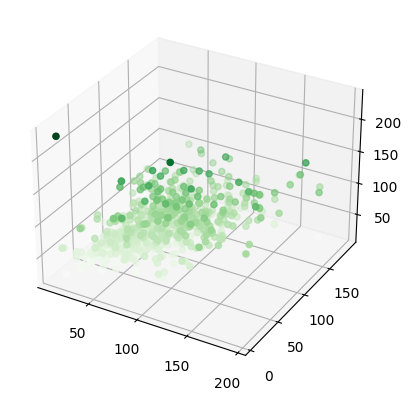

In [29]:
ax = plt.axes(projection='3d')

xdata = df['sp. atk']
ydata = df['attack']
zdata = df['sp. def']

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

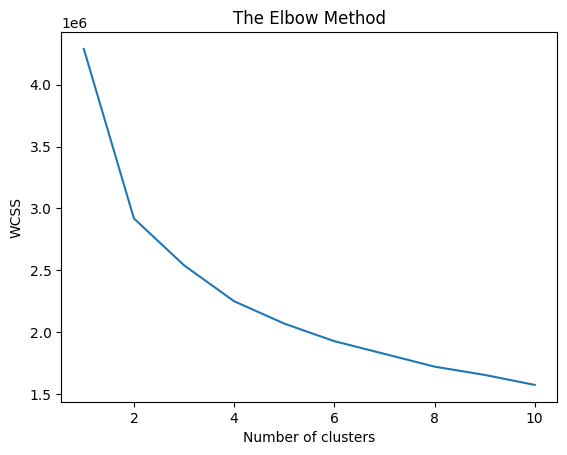

In [18]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Fit the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

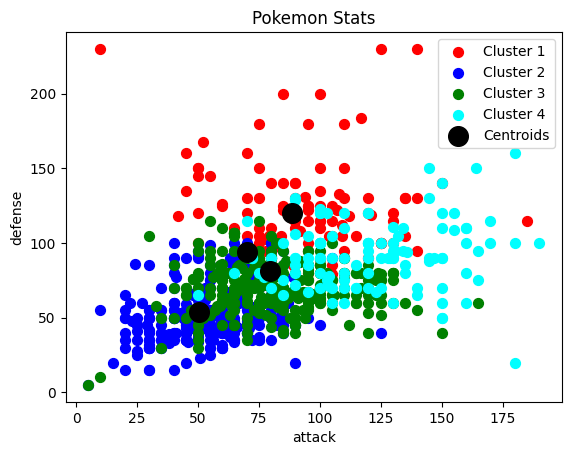

In [20]:
# Plot the clusters
plt.scatter(df[y_kmeans == 0]['attack'], df[y_kmeans == 0]['defense'], s=50, c='red', label='Cluster 1')
plt.scatter(df[y_kmeans == 1]['attack'], df[y_kmeans == 1]['defense'], s=50, c='blue', label='Cluster 2')
plt.scatter(df[y_kmeans == 2]['attack'], df[y_kmeans == 2]['defense'], s=50, c='green', label='Cluster 3')
plt.scatter(df[y_kmeans == 3]['attack'], df[y_kmeans == 3]['defense'], s=50, c='cyan', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('Pokemon Stats')
plt.xlabel('attack')
plt.ylabel('defense')
plt.legend()
plt.show()

In [21]:
# Add new column to the data
df['Cluster'] = y_kmeans

In [22]:
# Show the first 5 rows of the data
df.head()

,hp,attack,defense,sp. atk,sp. def,speed,Cluster
0,45,49,49,65,65,45,1
1,60,62,63,80,80,60,2
2,80,82,83,100,100,80,2
3,80,100,123,122,120,80,3
4,39,52,43,60,50,65,1


In [23]:
# Data type of the Cluster column
df['Cluster'].dtype

dtype('int32')

In [24]:
df['Cluster'].unique()

array([1, 2, 3, 0])

In [25]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))